<a href="https://colab.research.google.com/github/agusffiant/final_project/blob/main/Proyecto_final%2BFernandez_Fiant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis y proceso de modelado para predecir el abandono en los puestos de trabajo de la empresa HR Solutions**

# **Índice**


**1**.   Exportar librerías y dataset

**2**.   Resumen y descripción del dataset

    1.1 Definición del objetivo
    1.2 Contexto comercial
    1.3 Problema comercial
    1.4 Problema analítico
    1.5 Descripción del dataframe

**3**.   Data wrangling

**4**.   Exploratory Data Analysis (EDA)

    4.1 Hipótesis 1
    4.2 Hipótesis 2
    4.3 Hipótesis 3
    4.4 Hipótesis 4
    4.5 Hipótesis 5
    4.6 Matriz de correlación

**5**.   Machine Learning Model

    5.1 Target
    5.2 One hot encoding
    5.3 Feature Scaling
    5.4 Baseline model: Regresión logística
    5.5 Segundo modelo: XGBoost
        5.5.1 Hyperparameter tuning
    5.6 Cross-validation
        5.6.1 Comparación de modelos
    5.7 Entrenamiento de modelos y cálculo de métricas
        5.7.1 Matriz de confusión
        5.7.2 Under/Overfitting
        5.7.3 Shap values
        5.7.4 Comparación de modelos
    5.8 Mejoras de los modelos

**6**.   Next steps

# **1. Exportar librerías y dataset**

In [ ]:
!pip install shap

import sys
!{sys.executable} -m pip install pandas-profiling

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import xgboost as xgb
import shap

from sklearn import metrics, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, KFold, cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, confusion_matrix,r2_score
from sklearn.cluster import KMeans

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-1-fb7cfec99051>:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive')
df_hr= pd.read_csv('/content/gdrive/MyDrive/Curso data science/Desafios/2. Desafio/HR-Employee-Attrition.csv',sep=',')

df_hr

Mounted at /content/gdrive


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


En esta sección, importamos todas las librerías que usamos en el proyecto y el dataframe sobre la que vamos a trabajar, que cuenta con 1470 filas y 35 columnas

# **2. Resumen y descripción del dataset**

**Resumen**

> **Definición del objetivo**

Predecir si los empleados van a abandonar su puesto de trabajo en función de las variables relevantes con el fin de que la empresa pueda tomar medidas preventivas para retener a sus empleados y determinar si se puede construir un modelo de ML.

> **Contexto comercial**

Hoy en día, uno de los principales problemas que tienen las empresas es el abandono en los puestos de trabajo de las mismas, ya que implica invertir en formar a nuevos empleados. 

La rotación de personal puede tener un impacto negativo en la productividad, el desempeño y la cultura de la empresa.

Según estudios, un hombre tiene más probabilidad de abandonar el puesto de trabajo que una mujer, y esto puede costar un 50% más del sueldo anual del empleado actual, ya que el empleado pasa por un periodo donde la empresa invierte en él, pero luego llega a una etapa aún más larga donde entrega valor a la organización.

En conclusión, la pérdida de empleados puede ser costosa para la empresa, ya que puede tener que incurrir en costos de contratación y capacitación para reemplazar a los empleados que se van. Por lo tanto, es importante para las empresas identificar las causas de la rotación y tomar medidas preventivas para retener a sus empleados más valiosos.

> **Problema comercial**

Poder explicar a los stakeholders cuál es el contexto actual de la empresa, cuál es el target y cuáles son las variables involucradas que están afectadas por la rotación de personal para así, poder retener a sus empleados más valiosos.

> **Contexto analítico**


En este proyecto, se utilizarán técnicas de machine learning para predecir si un empleado abandonará su puesto de trabajo o no. Se utilizarán datos históricos de la empresa, como información de los empleados, salarios, antigüedad, desempeño, satisfacción laboral y otros factores relevantes, para entrenar modelos de machine learning. El objetivo es crear modelos precisos que puedan predecir la rotación de empleados y, posteriormente, utilizarlos para identificar los factores que contribuyen a la rotación y desarrollar medidas preventivas para retener a los empleados más valiosos.

Estos resultados, se van a entregar al responsable de recursos humanos.








> **Descripcion del dataframe**

**Age**: integer

**Attrition**: object, Employee leaving the company (0=no, 1=yes)

**BusinessTravel**: object. Travel_rarely, Travel_frequently & Non-Travel

**DailyRate**: integer. Salary Level

**Department**: object. Research & development, sales, human resources

**DistanceFromHome**: integer. Distance from home to work

**Education**: integer. (1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor')

**EducationField**: object. (HR, LIFE SCIENCES, MARKETING, MEDICAL SCIENCES, OTHERS, TECHNICAL)

**EmployeeCount**: integer

**EmployeeNumber**: integer. Employee ID

**EnvironmentSatisfaction**: integer. (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

**Gender**: object. Female & Male

**HourlyRate**: integer. hourly salary

**JobInvolvement**: integer. (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

**JobLevel**: integer. (1:'others',2: 'technical staff', 3: 'middle management', 4:'directors',5:'counselors')

**JobRole**: object. (HR REP, HR, LAB TECHNICIAN, MANAGER, MANAGING DIRECTOR, RESEARCH DIRECTOR, RESEARCH SCIENTIST, SALES EXECUTIVE, SALES REPRESENTATIVE)

**JobSatisfaction**: integer.  (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

**MaritalStatus**: object. (DIVORCED, MARRIED, SINGLE)

**MonthlyIncome**: integer. Monthly salary

**MonthlyRate**: integer. Monthly rate

**NumCompaniesWorked**: integer. Number of companies worked at

**Over18**: object. Y or N

**OverTime**: object. Yes or no

**PercentSalaryHike**: integer. Percentage increase in salary

**PerformanceRating**: integer. (1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding')

**RelationshipSatisfaction**: integer. (1 'Low' 2 'Medium' 3 'High' 4 'Very High')

**StandardHours**: integer

**StockOptionLevel**: integer. (Higher the number, the more stock option an employee has)

**TotalWorkingYears**: integer

**TrainingTimesLastYear**: integer. Hours spent training

**WorkLifeBalance**: integer. Time spent between work and outside. (1 'Bad' 2 'Good' 3 'Better' 4 'Best')

**YearsAtCompany**: integer. Total number of years at the company

**YearsInCurrentRole**: integer

**YearsSinceLastPromotion**: integer

**YearsWithCurrManager**: integer. Years spent with current manager

In [ ]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Es importante conocer las variables con las que vamos a trabajar y analizar y que significa cada una de ellas.

Utilizamos describe para obtener un resumen estadístico de nuestro dataset, lo que resulta muy útil para entender rápidamente el conjunto de datos que se está trabajando.

Obtenemos un conjunto de estadísticas que incluyen el número de observaciones (filas), la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50% y 75%) de cada una de las columnas numéricas.

Esto también nos permite ver si hay valores atípicos, por ejemplo, si la edad tendría un mínimo de 15 no sería correcto ya que debería ser mayor de 18 para poder trabajar, o por el contrario, un máximo de 100 años.

# **3. Data wrangling**

Como todos sabemos, necesitamos un preprocesamiento de los datos, por lo que llevamos adelante el siguiente proceso:



*   Analizamos los tipos de datos
*   Limpieza de ellos



In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Conclusión:** Como no hay datos nulos, no aplicamos ningún tipo de proceso para reemplazar o eliminar los mismos. En caso de que hubiera columnas con valores nulos, deberíamos ver el porcentaje que implican en las mismas y decidir si conviene borrar la columna entera (en caso de que no aporte valor al modelo) o reemplazarlos con la mediana por ejemplo.
Además, analizamos los tipos de datos de nuestro dataset con los que vamos a trabajar, para ver si más adelante es necesario escalar las variables numéricas o hacer one hot encoding de las categóricas 

In [ ]:
df_hr.dtypes.value_counts()

int64     26
object     9
dtype: int64

Aquí podemos ver que tenemos 26 variables que son integer y 9 variables que son objetos

## Variables categóricas ordinales

Hemos detectado 8 variables categoricas ordinales, por lo que las convertimos a nominales, para después poder hacer one hot encoding y escalar los datos y que todos sean considerados con el mismo rango

In [ ]:
ordinal_features = ['JobLevel','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df_hr[ordinal_features].head()

,JobLevel,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,2,3,4,3,1,1
1,2,1,3,2,2,4,4,3
2,1,2,4,2,3,3,2,3
3,1,4,4,3,3,3,3,3
4,1,1,1,3,2,3,4,3


In [ ]:
job_level = {1:'others',2: 'technical staff', 3: 'middle management', 4:'directors',5:'counselors'}
education_level = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
job_satisfaction_level = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
Environment_Satisfaction = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
Job_Involvement = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
Performance_Rating = {1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'}
Relationship_Satisfaction = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
WorkLife_Balance = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
df_hr[['job_levels','education_levels','job_satisfaction_levels','Environment_Satisfactions', 'Job_Involvements', 'Performance_Ratings', 'Relationship_Satisfactions', 'WorkLife_Balances' ]] = df_hr[['JobLevel','Education','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement', 'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']].replace({'JobLevel':job_level,'Education':education_level, 'JobSatisfaction': job_satisfaction_level,'EnvironmentSatisfaction': Environment_Satisfaction,'JobInvolvement': Job_Involvement, 'PerformanceRating': Performance_Rating,'RelationshipSatisfaction': Relationship_Satisfaction,'WorkLifeBalance': WorkLife_Balance}).astype(object)
df_hr.drop(columns=['JobLevel','Education','JobSatisfaction','EnvironmentSatisfaction','JobInvolvement', 'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance'],inplace=True)
df_hr


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,...,YearsSinceLastPromotion,YearsWithCurrManager,job_levels,education_levels,job_satisfaction_levels,Environment_Satisfactions,Job_Involvements,Performance_Ratings,Relationship_Satisfactions,WorkLife_Balances
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,...,0,5,technical staff,College,Very High,Medium,High,Excellent,Low,Bad
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,...,1,7,technical staff,Below College,Medium,High,Medium,Outstanding,Very High,Better
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,...,0,0,others,College,High,Very High,Medium,Excellent,Medium,Better
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,...,3,0,others,Master,High,Very High,High,Excellent,High,Better
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,...,2,2,others,Below College,Medium,Low,High,Excellent,Very High,Better
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,1,2061,Male,...,0,3,technical staff,College,Very High,High,Very High,Excellent,High,Better
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,1,2062,Male,...,1,7,middle management,Below College,Low,Very High,Medium,Excellent,Low,Better
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,1,2064,Male,...,0,3,technical staff,Bachelor,Medium,Medium,Very High,Outstanding,Medium,Better
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,1,2065,Male,...,0,8,technical staff,Bachelor,Medium,Very High,Medium,Excellent,Very High,Good


# **4. Exploratory Data Analysis (EDA)**

**¿Existe una brecha salarial en función del género? De ser así, ¿cómo podríamos solucionarlo?**

> **1. Hipótesis: Estadísticamente, hay más hombres que mujeres en la empresa, son los que tienen los cargos más altos y mejores salarios**



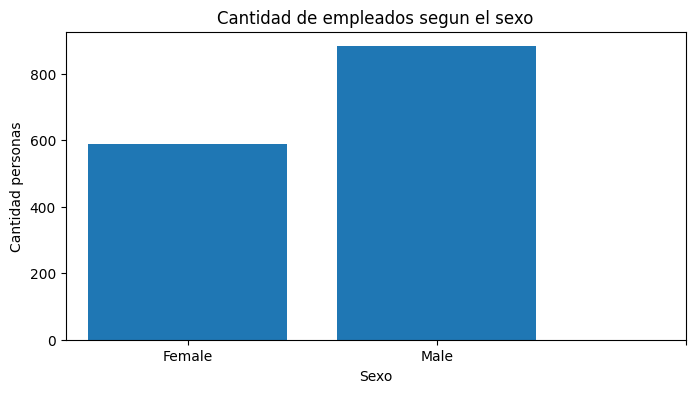

In [ ]:
genero_empleados=pd.Series(df_hr.groupby('Gender').size())
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(genero_empleados.index,genero_empleados.values)

ax.set_title('Cantidad de empleados segun el sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Cantidad personas')

plt.xticks(np.arange(0,3, step=1))
plt.show()

Aquí podemos ver que la cantidad de mujeres en la empresa es de 588 y de hombres 882, representando estos últimos el 60% de la plantilla

**Ahora nos preguntamos, cual es la distribución en los distintos cargos de la empresa entre hombres y mujeres?**

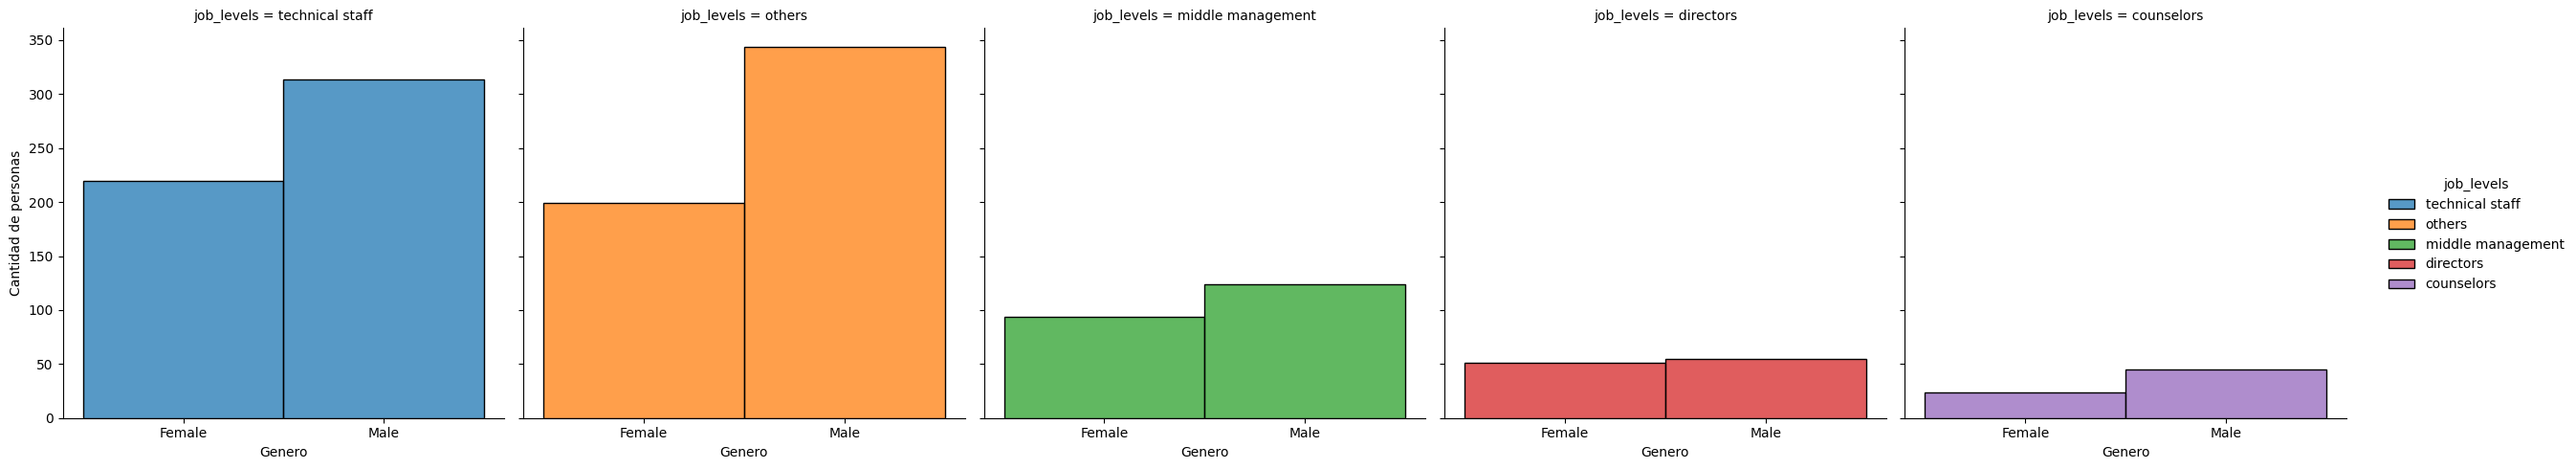

In [ ]:
sns.displot(data=df_hr,
            x="Gender", 
            hue="job_levels",
            multiple="stack",
            col="job_levels",
            #legend=False
            ).set(xlabel='Genero', ylabel='Cantidad de personas')
plt.show()


También es interesante apreciar como varía la cantidad de personas por género según el cargo que tienen en la empresa. Nuevamente, podemos ver una similitud en el comportamiento. En el cargo de director o directora, se puede ver una paridad en la cantidad de personas según el sexo, por lo que se podría analizar en profundidad más adelante.

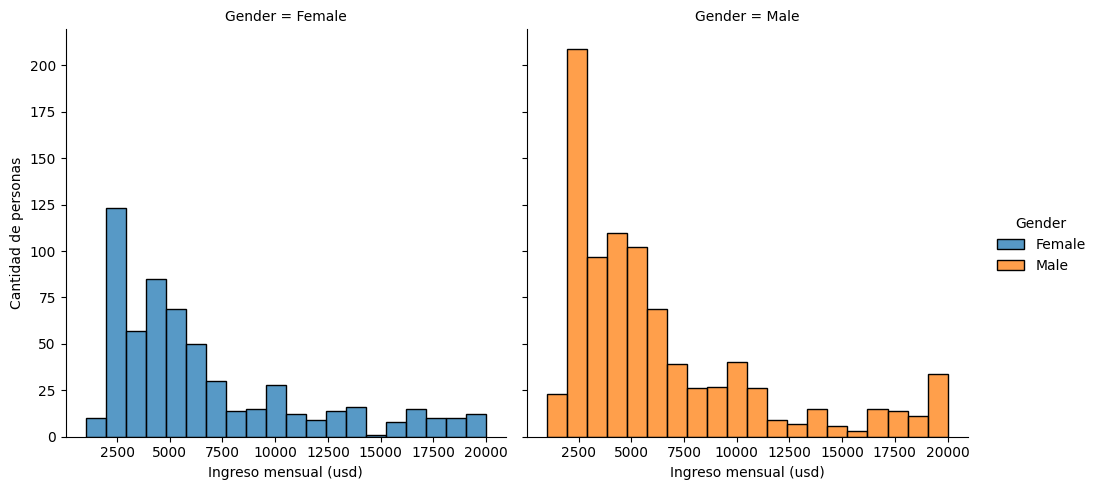

In [ ]:
sns.displot(data=df_hr, 
            x="MonthlyIncome", 
            hue="Gender",
            multiple="stack",
            col="Gender"
            ).set(xlabel='Ingreso mensual (usd)', ylabel='Cantidad de personas')

plt.show()

Podemos observar como los ingresos mensuales tienen el mismo comportamiento para hombres y para mujeres. Se genera un pico máximo en los 2500usd y después comienza a bajar.

Si bien hay más hombres que mujeres, como ya demostramos no hay una correlación entre los salarios de los hombres y mujeres. No se puede observar una brecha salarial entre ambos.

> **2. Hipótesis: Está estadísticamente comprobado que los hombres cobran un sueldo más alto que las mujeres y que a medida que son más grandes cobran más**





The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



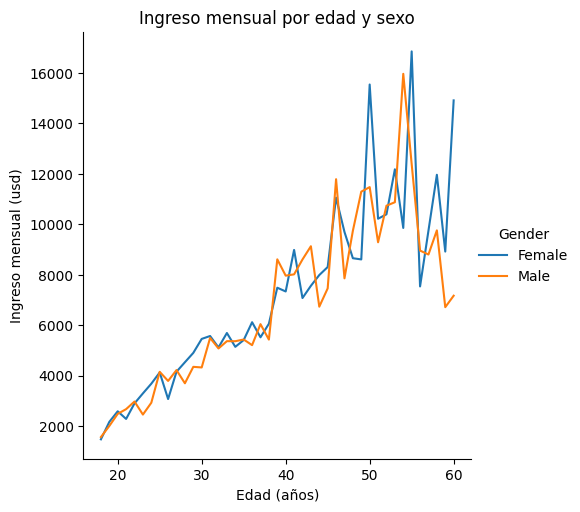

In [ ]:
fig = sns.relplot(data=df_hr, 
                 kind='line',
                 x='Age', 
                 y='MonthlyIncome', 
                 hue='Gender', #Divide el sexo en las dos líneas
                 ci=None ##ignora intervalos de confianza
                  ) 
fig.set(xlabel='Edad (años)', ylabel='Ingreso mensual (usd)', title='Ingreso mensual por edad y sexo')
plt.show()



En promedio, las mujeres tienen un ingreso mensual más alto que los hombres, por lo que la primera sentencia de la hipótesis no es cierta. A mayor edad, mayor es el cobro mensual. Existe una relación proporcional entre la edad y el ingreso mensual en periodos altos, por lo que podemos asegurar que la segunda parte de la hipótesis sí que es cierta.

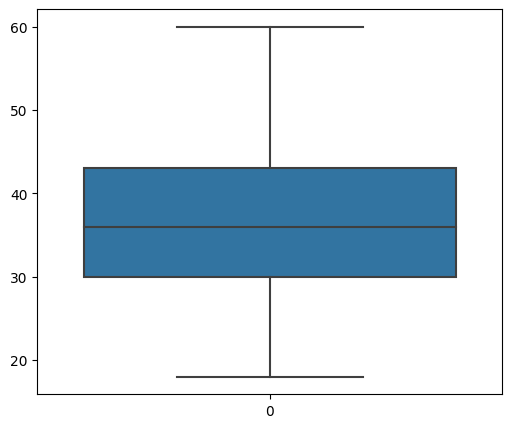

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(df_hr['Age'])
plt.show()

Podemos observar que no hay outliers para la variable de la edad, que el rango oscila entre los 18 y 60 años, con una media de 36 años.

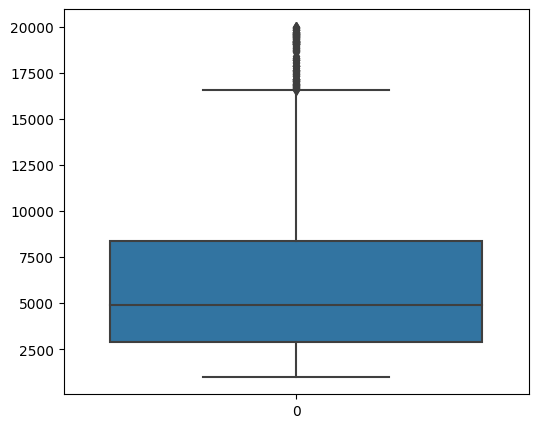

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(df_hr['MonthlyIncome'])
plt.show()

Text(0.5, 1.0, 'Monthly Income vs Gender')

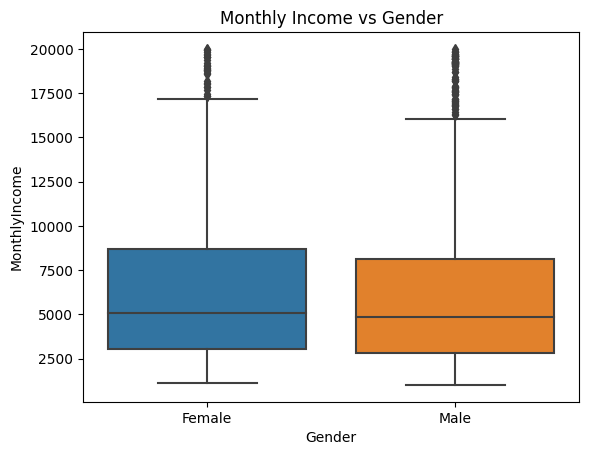

In [ ]:
sns.boxplot(x='Gender', y = 'MonthlyIncome', data = df_hr) 
plt.title("Monthly Income vs Gender")

In [ ]:
df_hr['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

Podemos observar que existen hay outliers para la variable del ingreso mensual, que el rango oscila entre los 1.009  y 19.999 usd, con una media de $6.502

In [ ]:
# Remover outliers para la columna de ingreso mensual
def removeOutliers(df,col):

    Q3 = np.quantile(df[col], 0.75)
    print('quartil 3 es ', Q3)

    Q1 = np.quantile(df[col], 0.25)
    print('quartil 1 es ',Q1)
    
    IQR = Q3 - Q1 #rango intercuartilico
    print('rango intercuartilico es ', IQR)
 
    lower_range = Q1 - 1.5 * IQR
    print('extremo inferior es ', lower_range) #bigote inferior

    upper_range = Q3 + 1.5 * IQR
    print('extremo superior es ', upper_range) #bigote superior

    df = df.loc[(df[col] > lower_range) & (df[col] < upper_range),:]

    return df
 
 
df_hr=removeOutliers(df_hr,'MonthlyIncome')

quartil 3 es  8379.0
quartil 1 es  2911.0
rango intercuartilico es  5468.0
extremo inferior es  -5291.0
extremo superior es  16581.0


Creamos una función para eliminar los outliers del monthly income

> **Recomendaciones:**



Analizar si es necesario balancear el 40% de las mujeres sobre el 60% de los hombres y que la empresa cuente con un 50% de cada género.
También se podría ver en profundidad si los que tienen ingresos de $ 2500 la proporción de mujeres y hombres es la misma y sino que es lo que la influencia.
También se podría ver si algún departamento tiene más hombres porque no hay muchas mujeres que se postulen para el puesto, por lo que se podría ver como modificar esto.
Además, se podría analizar si la satisfacción en el trabajo o el equilibrio entre la vida laboral y personal influye en el género.

**Ahora queremos analizar como se comporta nuestra empresa con respecto al problema comercial planteado**

> Primero, vamos a analizar qué porcentaje de los empleados abandonan el puesto de trabajo

In [ ]:
df_hr['Attrition'].value_counts()

No     1124
Yes     232
Name: Attrition, dtype: int64

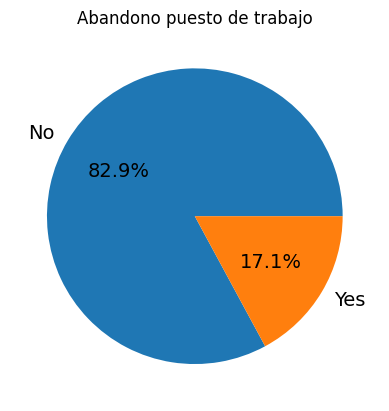

In [ ]:
# Calcular counts para cada categoría de la variable
counts = df_hr['Attrition'].value_counts()

# Crear el pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontsize': 14}) #para aumentar tamaño de fuente

plt.title('Abandono puesto de trabajo')

plt.show()

Podemos ver que el 82,9% de los empleados deciden no abandonar la empresa, mientras que sólo el 17,1% decide abandonarla

> **3. Hipótesis: Quienes abandonan su puesto de trabajo son quienes tienen una relación calidad de vida-trabajo negativa**

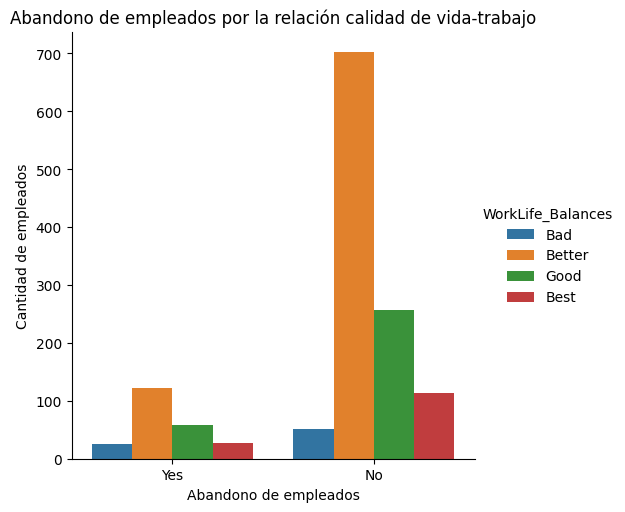

In [ ]:
sns.catplot(data=df_hr, 
            x="Attrition", 
            hue="WorkLife_Balances",
            kind='count'
            
            )
plt.title('Abandono de empleados por la relación calidad de vida-trabajo')
plt.xlabel('Abandono de empleados')
plt.ylabel('Cantidad de empleados')
plt.show()

Se puede observar que en esta empresa, la mayor parte de los empleados, no renuncia a su puesto de trabajo y que quienes lo hacen, no lo hacen por tener una mala una relación con la calidad de vida-trabajo

> **4. Hipótesis: Quienes abandonan su puesto de trabajo son los que se dedican a marketing**

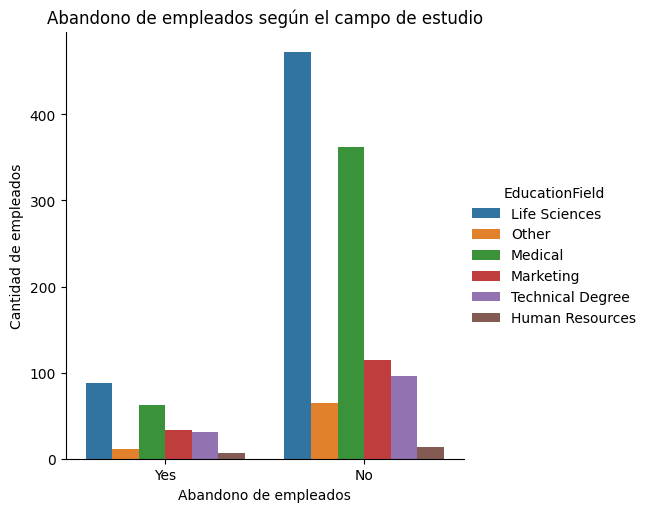

In [ ]:
sns.catplot(data=df_hr, 
            x="Attrition", 
            hue="EducationField",
            kind='count'
            
            )
plt.title('Abandono de empleados según el campo de estudio')
plt.xlabel('Abandono de empleados')
plt.ylabel('Cantidad de empleados')
plt.show()

Nuevamente, se puede observar que en esta empresa, la mayor parte de los empleados, no renuncia a su puesto de trabajo y que quienes lo hacen, no guardan una relación con su educación

> **5. Hipótesis: Los hombres tienden a abandonar la empresa más que las mujeres**

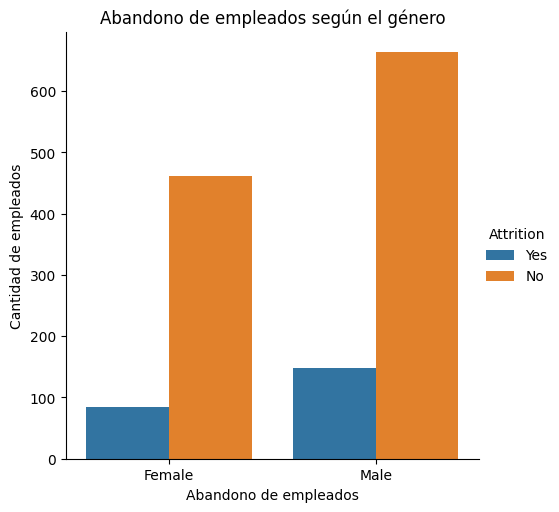

In [ ]:
sns.catplot(data=df_hr, 
            x="Gender", 
            hue="Attrition",
            kind='count'
            
            )
plt.title('Abandono de empleados según el género')
plt.xlabel('Abandono de empleados')
plt.ylabel('Cantidad de empleados')
plt.show()

Podemos ver que no hay una relación en cuánto al género y al abandono de los puestos de trabajo dentro de la empresa

**Realizamos la matriz de correlación entre las variables**

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot: >

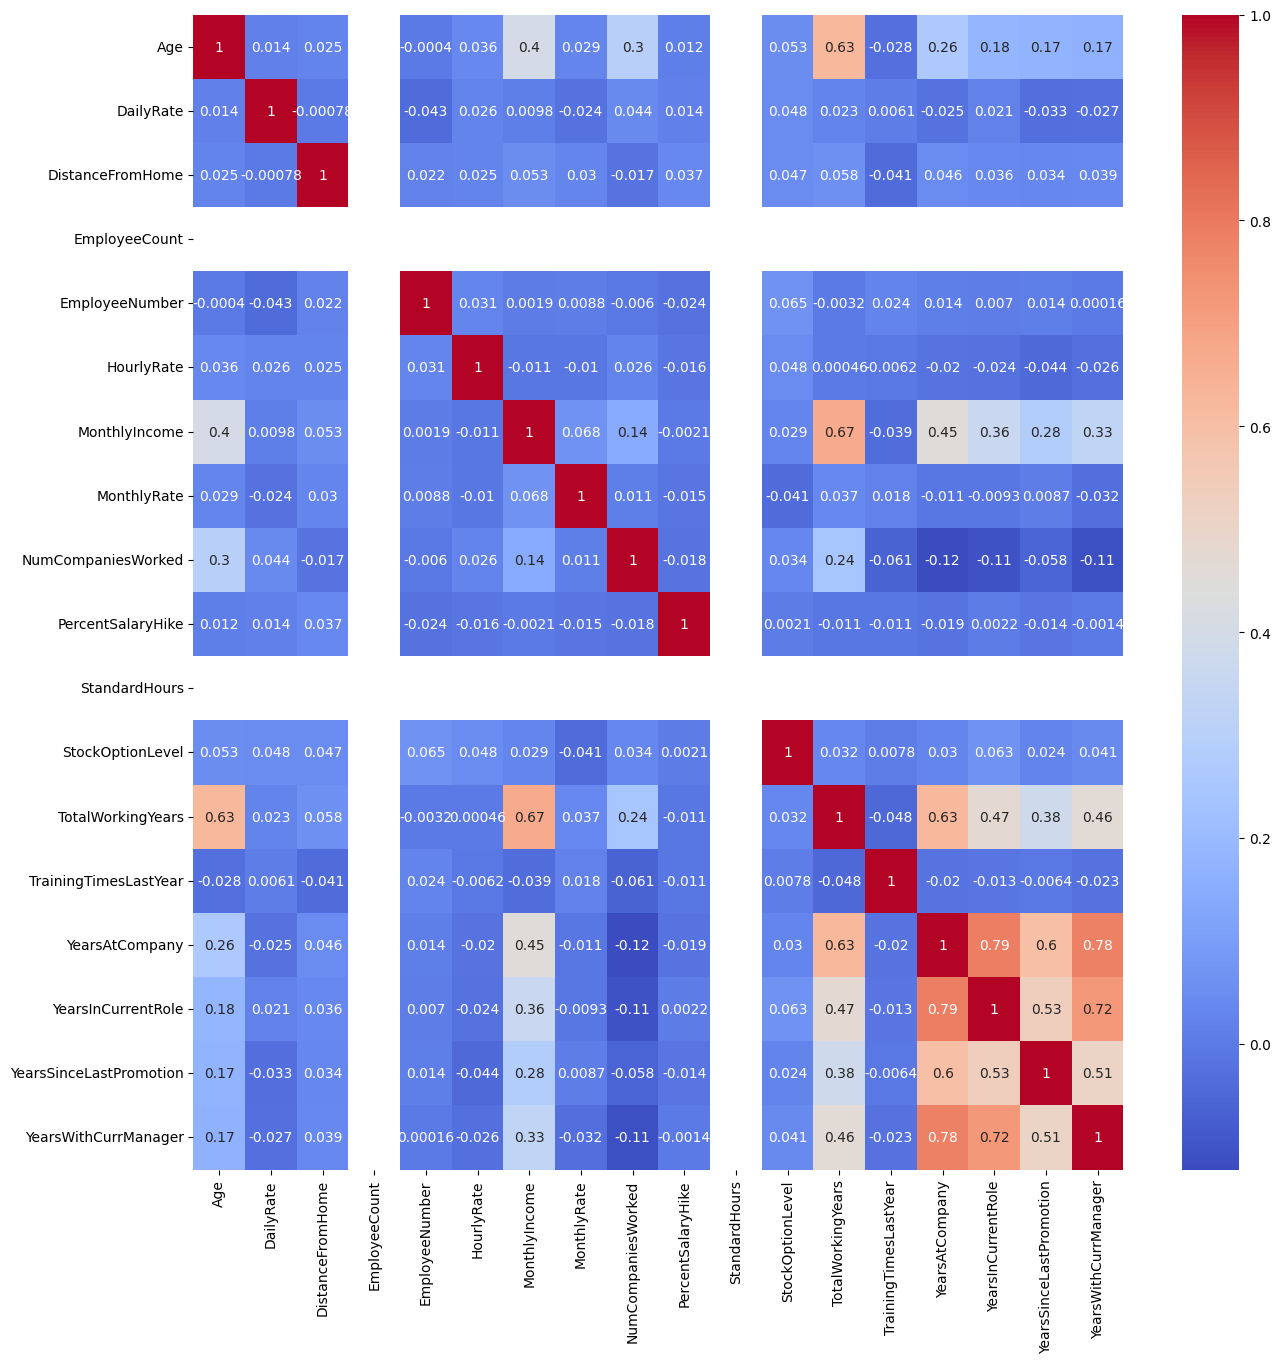

In [ ]:
# Crear matriz de correlación
corr_matrix = df_hr.corr()

# Establecer tamaño de la figura
plt.figure(figsize=(15,15))

# Graficar matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

El objetivo es identificar las variables que están correlacionadas entre sí. La barra de la derecha, muestra el grado de correlación y la escala en colores lo hace más visual.

Aquí podemos observar por ejemplo, como la variable "years at the company"  está correlacionada con la variable de "total working years" en un 0.63 y con la variable "years with current manager" en un 0.79 y con "monthly income" en un 0.67.

Por el contrario, podemos ver comno la variable "employee number" no guarda una correlación significativa con ninguna otra variable.

**Una vez finalizado el análisis exploratorio de datos, vamos a prodecer a realizar un modelo para poder predecir nuestra variable objetivo, predecir si los empleados van a abandonar su puesto de trabajo**

# **5. Machine Learning Model**

## Establecemos el target

In [ ]:
Attrition_bin = pd.DataFrame(df_hr['Attrition'])
df_hr['Attrition_target'] = Attrition_bin.apply(lambda row: 1 if row['Attrition'] == 'Yes' else 0, axis=1)
df_hr.head().T


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7
Gender,Female,Male,Male,Female,Male


Nuestro target a predecir es si abandona su puesto de trabajo (1) o si no lo abandona (0)

## Definimos nuestra X e y

In [ ]:
X2 = df_hr.drop(['Attrition','Attrition_target'],axis= 1) # Features
y = df_hr.Attrition_target # Target variable
X2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,Gender,HourlyRate,...,YearsSinceLastPromotion,YearsWithCurrManager,job_levels,education_levels,job_satisfaction_levels,Environment_Satisfactions,Job_Involvements,Performance_Ratings,Relationship_Satisfactions,WorkLife_Balances
0,41,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,Female,94,...,0,5,technical staff,College,Very High,Medium,High,Excellent,Low,Bad
1,49,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,Male,61,...,1,7,technical staff,Below College,Medium,High,Medium,Outstanding,Very High,Better
2,37,Travel_Rarely,1373,Research & Development,2,Other,1,4,Male,92,...,0,0,others,College,High,Very High,Medium,Excellent,Medium,Better
3,33,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,Female,56,...,3,0,others,Master,High,Very High,High,Excellent,High,Better
4,27,Travel_Rarely,591,Research & Development,2,Medical,1,7,Male,40,...,2,2,others,Below College,Medium,Low,High,Excellent,Very High,Better


Como mencionamos anteriormente, nuestro target a predecir es si algún emplead@ va a abandonar su puesto de trabajo o no

## One hot encoding

Primero, vamos a determinar los tipos de features que tenemos en nuestro dataset:

**CATEGORICAL NOMINAL:** BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime, Attrition

**CATEGORICAL ORDINAL:** Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, WorkLifeBalance

**NUMERICAL:** Age, DailyRate, DistanceFromHome, EmployeeCount, EmployeeNumber, HourlyRate, MonthlyIncome, MinthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, StandardHours, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager	

In [ ]:
X2 = pd.get_dummies(data=X2, drop_first=True)
X2.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,Job_Involvements_Low,Job_Involvements_Medium,Job_Involvements_Very High,Performance_Ratings_Outstanding,Relationship_Satisfactions_Low,Relationship_Satisfactions_Medium,Relationship_Satisfactions_Very High,WorkLife_Balances_Best,WorkLife_Balances_Better,WorkLife_Balances_Good
0,41,1102,1,1,1,94,5993,19479,8,11,...,0,0,0,0,1,0,0,0,0,0
1,49,279,8,1,2,61,5130,24907,1,23,...,0,1,0,1,0,0,1,0,1,0
2,37,1373,2,1,4,92,2090,2396,6,15,...,0,1,0,0,0,1,0,0,1,0
3,33,1392,3,1,5,56,2909,23159,1,11,...,0,0,0,0,0,0,0,0,1,0
4,27,591,2,1,7,40,3468,16632,9,12,...,0,0,0,0,0,0,1,0,1,0


Transformamos todas nuestras variables categóricas en numéricas y revisamos los tipos de datos para asegurarnos que estén correctos

In [ ]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1356 entries, 0 to 1469
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   1356 non-null   int64
 1   DailyRate                             1356 non-null   int64
 2   DistanceFromHome                      1356 non-null   int64
 3   EmployeeCount                         1356 non-null   int64
 4   EmployeeNumber                        1356 non-null   int64
 5   HourlyRate                            1356 non-null   int64
 6   MonthlyIncome                         1356 non-null   int64
 7   MonthlyRate                           1356 non-null   int64
 8   NumCompaniesWorked                    1356 non-null   int64
 9   PercentSalaryHike                     1356 non-null   int64
 10  StandardHours                         1356 non-null   int64
 11  StockOptionLevel                      1356 

## Feature Scaling

In [ ]:
scaled=StandardScaler().fit_transform(X2)

X2=pd.DataFrame(scaled,columns=X2.columns,index=X2.index)
X2.head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,Job_Involvements_Low,Job_Involvements_Medium,Job_Involvements_Very High,Performance_Ratings_Outstanding,Relationship_Satisfactions_Low,Relationship_Satisfactions_Medium,Relationship_Satisfactions_Very High,WorkLife_Balances_Best,WorkLife_Balances_Better,WorkLife_Balances_Good
0,0.563466,0.743224,-1.027431,0.0,-1.696510,1.384037,0.147723,0.720236,2.156818,-1.164464,...,-0.245364,-0.588705,-0.333879,-0.428073,2.058038,-0.507824,-0.637683,-0.33931,-1.244537,-0.550085
1,1.471981,-1.297187,-0.166218,0.0,-1.694860,-0.245090,-0.112325,1.481630,-0.657660,2.126861,...,-0.245364,1.698643,-0.333879,2.336053,-0.485900,-0.507824,1.568178,-0.33931,0.803512,-0.550085
2,0.109209,1.415097,-0.904400,0.0,-1.691558,1.285302,-1.028366,-1.676021,1.352681,-0.067356,...,-0.245364,1.698643,-0.333879,-0.428073,-0.485900,1.969187,-0.637683,-0.33931,0.803512,-0.550085
3,-0.345048,1.462202,-0.781370,0.0,-1.689907,-0.491927,-0.781577,1.236435,-0.657660,-1.164464,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,-0.637683,-0.33931,0.803512,-0.550085
4,-1.026433,-0.523665,-0.904400,0.0,-1.686605,-1.281807,-0.613134,0.320884,2.558886,-0.890187,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,1.568178,-0.33931,0.803512,-0.550085


Escalamos la data para asegurarnos que todas las features tengan un rango de valores similar.
Para simplificar decidimos escalar todas las variables, incluídas las get dummies, que aunque sabemos que no es necesario, no debería impactar. 

## Definimos nuestro baseline model

In [ ]:
logreg = LogisticRegression()
logreg.fit(X2, y)

LogisticRegression()

Vamos a elegir el modelo de regresión logística como nuestro modelo base

### Feature selection en función de los coeficientes de nuestro modelo

In [ ]:
extra_tree_class = ExtraTreesClassifier()

extra_tree_class.fit(X2,y)

feat_importance = extra_tree_class.feature_importances_

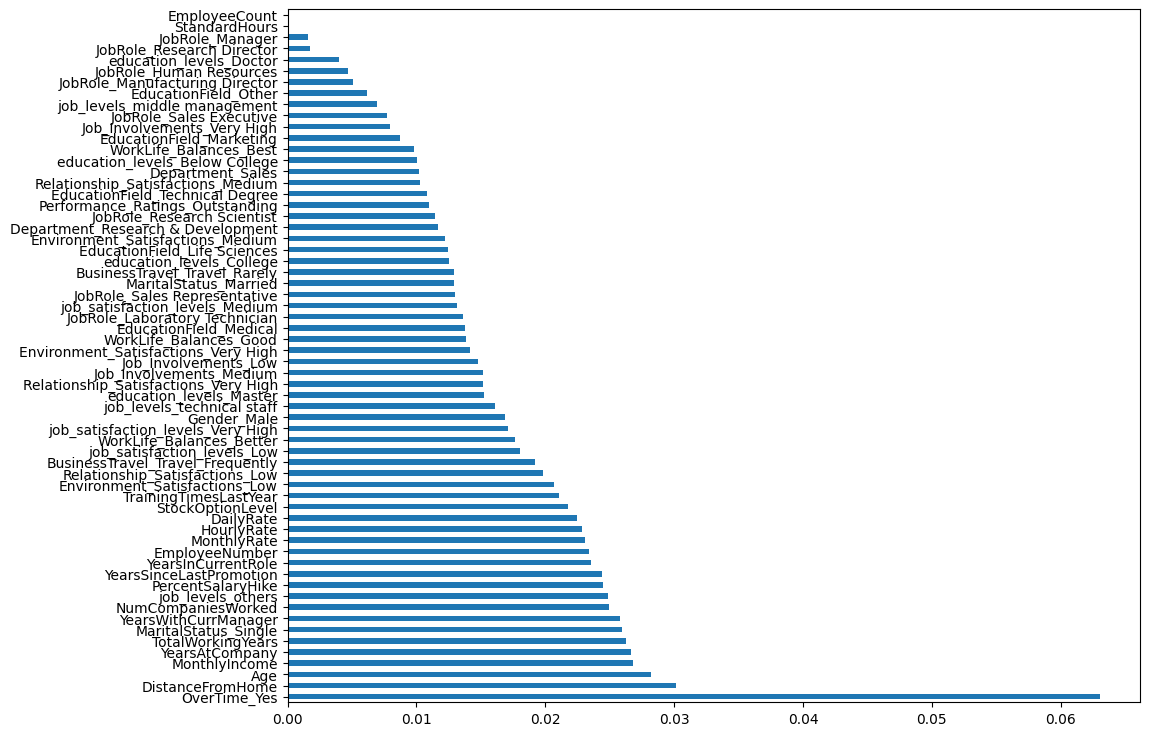

In [ ]:
#hacemos un gráfico para ver la importancia de las features en relación a nuestro target
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree_class.feature_importances_, index=X2.columns)

feat_imp.nlargest(63).plot(kind='barh')
plt.show()

Para poder determinar la importancia de las variables y si tienen relación con nuestro target, usamos el tree classifier. Anteriormente, probamos determinando el valor de los coeficientes para el modelo de regresión logística, pero no tenía sentido eliminar las variables que influían poco en nuestro target, porque logreg.coef_ no tiene en cuenta la interacción entre las variables.

In [ ]:
X = X2.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis= 1) # Features
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,Job_Involvements_Low,Job_Involvements_Medium,Job_Involvements_Very High,Performance_Ratings_Outstanding,Relationship_Satisfactions_Low,Relationship_Satisfactions_Medium,Relationship_Satisfactions_Very High,WorkLife_Balances_Best,WorkLife_Balances_Better,WorkLife_Balances_Good
0,0.563466,0.743224,-1.027431,1.384037,0.147723,0.720236,2.156818,-1.164464,-0.925401,-0.309371,...,-0.245364,-0.588705,-0.333879,-0.428073,2.058038,-0.507824,-0.637683,-0.33931,-1.244537,-0.550085
1,1.471981,-1.297187,-0.166218,-0.245090,-0.112325,1.481630,-0.657660,2.126861,0.233273,-0.005490,...,-0.245364,1.698643,-0.333879,2.336053,-0.485900,-0.507824,1.568178,-0.33931,0.803512,-0.550085
2,0.109209,1.415097,-0.904400,1.285302,-1.028366,-1.676021,1.352681,-0.067356,-0.925401,-0.461312,...,-0.245364,1.698643,-0.333879,-0.428073,-0.485900,1.969187,-0.637683,-0.33931,0.803512,-0.550085
3,-0.345048,1.462202,-0.781370,-0.491927,-0.781577,1.236435,-0.657660,-1.164464,-0.925401,-0.309371,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,-0.637683,-0.33931,0.803512,-0.550085
4,-1.026433,-0.523665,-0.904400,-1.281807,-0.613134,0.320884,2.558886,-0.890187,0.233273,-0.613252,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,1.568178,-0.33931,0.803512,-0.550085


Hemos decidido eliminar sólo las variables que no influyen en nuestro target, que son EmployeeCount, EmployeeNumber, StandardHours

In [ ]:
logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X, y)

LogisticRegression(class_weight='balanced')

## Split data para el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40000)

In [ ]:
print(X_train.shape, X_test.shape)

(1017, 59) (339, 59)


Dividimos nuestra data en set de entrenamiento (75%) y en set de test (25%)

## Definimos nuestro segundo modelo

### Buscamos los mejores parámetros

In [ ]:
# Creamos un XGBClassifier
xgb_clf = XGBClassifier()

# Creaamos el parámetro grid para buscar
param_grid = {
    "learning_rate": [0.01, 0.02, 0.03, 0.1, 0,2, 0.3], 
    "max_depth": [5,8,10,25],
    "gamma": [0, 0.25], 
    "n_estimators": [100,200,500,1000],
}

# Creamos el scoring metric
scorer = make_scorer(roc_auc_score)

# Creamos el GridSearchCV object
grid_search = GridSearchCV(
    xgb_clf, # Estimator
    param_grid, # Parameter grid
    scoring=scorer, # Scoring metric
    cv=5, # Cross-validation strategy
    n_jobs=-1, # Use all available CPU cores
)

# Ajuste el objeto GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500}


### Definimos el segundo modelo con los mejores parámetros

In [ ]:
# Computamos class weights
class_weights = len(y_train) / (2 * np.bincount(y_train))

# Definimos el the XGBoost model con class balancing
clf = XGBClassifier(max_depth=5, learning_rate=0.3, n_jobs=-1, gamma=0, n_estimators=500, scale_pos_weight=class_weights[1])

## Cross Validation

Primero vemos si nuestro target está o no balanceado

In [ ]:
y.value_counts()/len(y)

0    0.828909
1    0.171091
Name: Attrition_target, dtype: float64

Como podemos observar, el 82% decide no abandonar el puesto de trabajo, mientras que el 17% restante si lo abandona. Se puede ver que la data no está balanceada

### Seleccionamos StratifiedkFold para hacer cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=8, #dividir en 8 secciones
                     shuffle=True, 
                     random_state=42)

In [ ]:
cnt = 1
# El método split() genera índices para dividir los datos en conjuntos de entrenamiento y prueba
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1186, Test set:170
Fold:2, Train set: 1186, Test set:170
Fold:3, Train set: 1186, Test set:170
Fold:4, Train set: 1186, Test set:170
Fold:5, Train set: 1187, Test set:169
Fold:6, Train set: 1187, Test set:169
Fold:7, Train set: 1187, Test set:169
Fold:8, Train set: 1187, Test set:169


#### Calculamos las méticas para nuestro baseline model

In [ ]:
scoring = ['accuracy', 'roc_auc','f1','recall','precision']
estimator = LogisticRegression(random_state=42)
cv_results = cross_validate(estimator, X, y, cv=kf, scoring=scoring, return_train_score=True)

score_logreg_accuracy= cv_results['test_accuracy']
score_logreg_roc_auc= cv_results['test_roc_auc']
score_logreg_f1= cv_results['test_f1']
score_logreg_recall= cv_results['test_recall']
score_logreg_precision= cv_results['test_precision']

print('Accuracy:',score_logreg_accuracy)
print('ROC AUC:', score_logreg_roc_auc)
print('f1:', score_logreg_f1)
print('recall:' ,score_logreg_recall)
print('precision:' ,score_logreg_precision)


Accuracy: [0.88235294 0.85882353 0.87647059 0.90588235 0.84615385 0.89940828
 0.82840237 0.89940828]
ROC AUC: [0.84274884 0.85815603 0.86426999 0.83761311 0.78793103 0.89729064
 0.79876847 0.90812808]
f1: [0.54545455 0.57142857 0.58823529 0.68       0.43478261 0.65306122
 0.45283019 0.66666667]
recall: [0.4137931  0.55172414 0.51724138 0.5862069  0.34482759 0.55172414
 0.4137931  0.5862069 ]
precision: [0.8        0.59259259 0.68181818 0.80952381 0.58823529 0.8
 0.5        0.77272727]


In [ ]:
print('Accuracy:', np.mean(score_logreg_accuracy))
print('ROC AUC:', np.mean(score_logreg_roc_auc))
print('F1 Score:', np.mean(score_logreg_f1))
print('Recall:', np.mean(score_logreg_recall))
print('Precision:', np.mean(score_logreg_precision))

Accuracy: 0.8746127741037243
ROC AUC: 0.8493632742899067
F1 Score: 0.5740573874415156
Recall: 0.49568965517241376
Precision: 0.693112143847438


#### Calculamos las méticas para nuestro segundo modelo

In [ ]:
scoring = ['accuracy', 'roc_auc','f1','recall','precision']
estimator = XGBClassifier(random_state=42)
cv_results = cross_validate(estimator, X, y, cv=kf, scoring=scoring, return_train_score=True)

score_xgb_accuracy= cv_results['test_accuracy']
score_xgb_roc_auc= cv_results['test_roc_auc']
score_xgb_f1= cv_results['test_f1']
score_xgb_recall= cv_results['test_recall']
score_xgb_precision= cv_results['test_precision']

print('Accuracy:',score_xgb_accuracy)
print('ROC AUC:', score_xgb_roc_auc)
print('f1:',score_xgb_f1)
print('recall:' ,score_xgb_recall)
print('precision:' ,score_xgb_precision)

Accuracy: [0.88235294 0.83529412 0.82352941 0.86470588 0.85207101 0.86982249
 0.84023669 0.85798817]
ROC AUC: [0.75959892 0.84030325 0.72511617 0.76082172 0.80073892 0.84704433
 0.76921182 0.82536946]
f1: [0.47368421 0.46153846 0.375      0.5106383  0.3902439  0.5
 0.34146341 0.53846154]
recall: [0.31034483 0.4137931  0.31034483 0.4137931  0.27586207 0.37931034
 0.24137931 0.48275862]
precision: [1.         0.52173913 0.47368421 0.66666667 0.66666667 0.73333333
 0.58333333 0.60869565]


In [ ]:
print('Accuracy:', np.mean(score_xgb_accuracy))
print('ROC AUC:', np.mean(score_xgb_roc_auc))
print('F1 Score:', np.mean(score_xgb_f1))
print('Recall:', np.mean(score_xgb_recall))
print('Precision:', np.mean(score_xgb_precision))

Accuracy: 0.8532500870170554
ROC AUC: 0.7910255738392202
F1 Score: 0.4488787281839784
Recall: 0.35344827586206895
Precision: 0.6567648741418765


Como se puede observar, tanto para logreg como xgb, algunas métricas en el array están bastante bajas, por lo que su desviación estándar es alta en comparacion al promedio. Eso nos puede estar demostrando que para un set específico de entrenamiento y testeo el modelo es mucho más ineficiente

#### Comparamos los resultados de las métricas de cross-validation de nuestros dos modelos

In [ ]:
df_StratifiedkFold = pd.DataFrame({'Model': ['Logistic Regression', 'XGBoost'],
                   'Accuracy_score_StratifiedkFold': [score_logreg_accuracy.mean(), score_xgb_accuracy.mean()],
                   'AUC-ROC_score_StratifiedkFold': [score_logreg_roc_auc.mean(), score_xgb_roc_auc.mean()],
                   'F1_Score_StratifiedkFold': [score_logreg_f1.mean(), score_xgb_f1.mean()],
                   'Recall_Score_StratifiedkFold': [score_logreg_recall.mean(), score_xgb_recall.mean()],
                   'Precision_Score_StratifiedkFold': [score_logreg_precision.mean(),score_xgb_precision.mean()]
                   })

# Establecemos la columna de modelo como index
df_StratifiedkFold.set_index('Model', inplace=False)

# Creamos Styler object
styler = df_StratifiedkFold.style

# Aplicamos formato
styler = styler.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styler = styler.applymap(lambda x: 'background-color: #C2DFFF' if x > 0.8 else '', subset=['Recall_Score_StratifiedkFold', 'F1_Score_StratifiedkFold', 'AUC-ROC_score_StratifiedkFold', 'Accuracy_score_StratifiedkFold'])
styler = styler.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#7AB6FF'), ('color', 'white'), ('border', '1px solid black')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F2F2F2')]},
    {'selector': 'tbody tr:last-child', 'props': [('border-bottom', '2px solid black')]}
])


display(styler)


,Model,Accuracy_score_StratifiedkFold,AUC-ROC_score_StratifiedkFold,F1_Score_StratifiedkFold,Recall_Score_StratifiedkFold,Precision_Score_StratifiedkFold
0,Logistic Regression,0.874613,0.849363,0.574057,0.495690,0.693112
1,XGBoost,0.853250,0.791026,0.448879,0.353448,0.656765


Como podemos ver, según la comparación del cross validation con StratifiedkFold para nuestros dos modelos, el que presenta mejores métricas es el de regresión logística

## Entrenamiento de modelos y cálculo de métricas

### Entrenamos el baseline model

In [ ]:
# Entrenamos el modelo
logreg.fit(X_train, y_train)

# Evaluamos el modelo en el test set
test_y_pred = logreg.predict(X_test)

# Obtenemos las predicciones para la clase positiva
test_y_pred_prob = logreg.predict_proba(X_test)[:, 1]

### Cálculo de métricas del baseline model

In [ ]:
# Compute the accuracy, precision, recall, and F1 score for the test data
test_accuracy_logreg = accuracy_score(y_test, test_y_pred)
test_precision_logreg = precision_score(y_test, test_y_pred, pos_label=1)
test_recall_logreg = recall_score(y_test, test_y_pred, pos_label=1)
test_f1_logreg = f1_score(y_test, test_y_pred, pos_label=1)
test_auc_roc_logreg = roc_auc_score(y_test, test_y_pred_prob)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({'Model': ['Logistic Regression test'],
                   'Accuracy': [test_accuracy_logreg],
                   'Precision': [ test_precision_logreg],
                   'Recall': [ test_recall_logreg],
                   'F1 Score': [test_f1_logreg],
                   'AUC-ROC score':[test_auc_roc_logreg]})

# Set the Model column as the index
df.set_index('Model', inplace=False)

# Create a Styler object
styler = df.style

# Apply custom formatting
styler = styler.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styler = styler.applymap(lambda x: 'background-color: #C2DFFF' if x > 0.8 else '', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
styler = styler.set_table_styles([{'selector': 'th', 'props': [('background-color', '#7AB6FF'), ('color', 'white'), ('border', '1px solid black')]},
                                  {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                                  {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F2F2F2')]},
                                  {'selector': 'tbody tr:last-child', 'props': [('border-bottom', '2px solid black')]}])


# Render the styled table
display(styler)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC score
0,Logistic Regression test,0.805310,0.427083,0.788462,0.554054,0.868266


El modelo de regresión logística tiene un accuracy de 0,80, lo que significa que predice correctamente el resultado de la variable objetivo para aproximadamente el 80 % de los casos. La precisión del modelo es de 0,42, lo que indica que entre los casos positivos previstos, el 42% de ellos son realmente positivos. El racall del modelo es 0.78, lo que significa que el modelo puede identificar el 78% de los casos positivos reales. F1 Score del modelo es 0,55, que es la media armónica de precisión y recuperación y da una medida general de la precisión del modelo.

La puntuación AUC-ROC del modelo es 0,87, que es una medida de la capacidad del modelo para distinguir entre casos positivos y negativos. La puntuación varía de 0 a 1, donde 0,5 indica adivinanzas aleatorias y 1 indica clasificación perfecta. En este caso, la puntuación elevada lo que significa que la capacidad del modelo para distinguir entre los casos positivos y negativos es mejor que las conjeturas aleatorias.

### Definimos y graficamos la confusion matrix para el baseline model

La matriz de confusión representa la precisión de un modelo de clasificación binaria, donde se compara la verdadera clase de cada muestra con la clase predicha por el modelo

In [ ]:
# Computamos la confusion matrix para el test set
cm = confusion_matrix(y_test, test_y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[232  55]
 [ 11  41]]


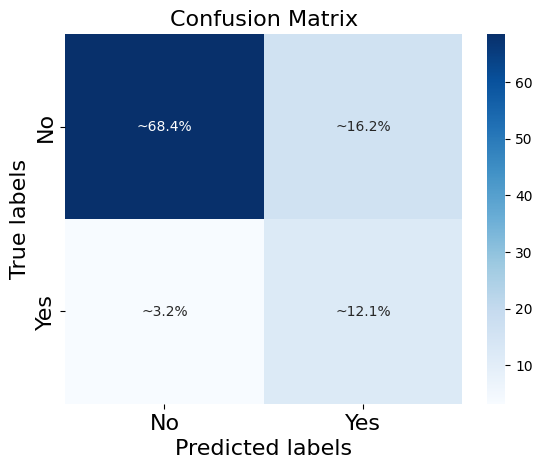

In [ ]:
# Computamos el total de número de muestras en el test set
total_samples = np.sum(cm)

# Computamos la confusion matrix en porcentaje
cm_percent = cm / total_samples * 100

# Creamos un heatmap para mostrar la confusion matrix
ax = sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues')

# Añadimos etiquetas y título plot
plt.xlabel('Predicted labels', fontsize=16)
ax.set_xticklabels(['No','Yes'], fontsize=16)
plt.ylabel('True labels', fontsize=16)
ax.set_yticklabels(['No','Yes'], fontsize=16)
plt.title('Confusion Matrix', fontsize=16)

# Agregar %
texts = ax.texts
for text in texts:
    text.set_text('~' + text.get_text() + '%')


plt.show()

Para el logreg, el modelo clasificó correctamente el 68% de las muestras negativas (True negatives).

El modelo clasificó incorrectamente el 3% de las muestras negativas como positivas (False negatives), lo que significa que el modelo no pudo detectar correctamente las muestras que eran realmente negativas.

El 16% de las muestras fueron clasificadas incorrectamente como positivas (False positives), lo que significa que el modelo no pudo identificar correctamente las muestras que eran realmente negativas.

Y por último, el modelo clasificó correctamente el 12% de las muestras positivas (True positives).

En resumen, el modelo parece tener un buen rendimiento en la clasificación de muestras negativas (68% de True negatives), pero no tan bueno en la clasificación de muestras positivas (12% de True positives). Además, el modelo tiene una tasa de error de clasificación de muestras negativas (3% de False negatives) y una tasa de falsos positivos relativamente alta (16% de False positives). En general, se puede concluir que el modelo tiene margen de mejora para mejorar su precisión en la clasificación de muestras positivas.

### Analizamos si el baseline model tiene underfitting / overfitting

In [ ]:
y_train_pred_logreg = logreg.predict(X_train) #Prediccion en Train

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred_logreg)
print('% de aciertos sobre el set de train:',train_accuracy)

% de aciertos sobre el set de train: 0.799410029498525


In [ ]:
y_test_pred = logreg.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, test_y_pred)

#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8053097345132744


Al ser la diferencia tan pequeña, no podemos afirmar que el modelo tiene underfitting (bias), ya que el accuracy del train set es menor por 0.1 al del test set

### Entrenamos XGBoost

In [ ]:
# Entrenamos el XGBoost model con class balancing
clf.fit(X_train, y_train)

# Hacemeos predicciones en el test set
y_pred_xgb = clf.predict(X_test)
y_pred_proba_xgb = clf.predict_proba(X_test)[:, 1]  # predicción para la clase positiva

### Cálculo de métricas para XGBoost

In [ ]:
# Compute the accuracy, precision, recall, and F1 score for the test data
test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
test_precision_xgb = precision_score(y_test, y_pred_xgb)
test_recall_xgb = recall_score(y_test, y_pred_xgb)
test_f1_xgb = f1_score(y_test, y_pred_xgb)
test_roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("Test Set Metrics")
print("Accuracy:", test_accuracy_xgb)
print("Precision:", test_precision_xgb)
print("Recall:", test_recall_xgb)
print("F1 score:", test_f1_xgb)
print("AUC-ROC score:", test_roc_auc_xgb)

Test Set Metrics
Accuracy: 0.8702064896755162
Precision: 0.5952380952380952
Recall: 0.4807692307692308
F1 score: 0.5319148936170213
AUC-ROC score: 0.7837041007772715


In [ ]:
# Create a DataFrame
df = pd.DataFrame({'Model': ['XGBoost'],
                   'Accuracy': [test_accuracy_xgb],
                   'Precision': [test_precision_xgb],
                   'Recall': [test_recall_xgb],
                   'F1 Score': [test_f1_xgb],
                   'AUC-ROC score':[test_roc_auc_xgb]})

# Set the Model column as the index
df.set_index('Model', inplace=False)

# Create a Styler object
styler = df.style

# Apply custom formatting
styler = styler.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styler = styler.applymap(lambda x: 'background-color: #C2DFFF' if x > 0.8 else '', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
styler = styler.set_table_styles([{'selector': 'th', 'props': [('background-color', '#7AB6FF'), ('color', 'white'), ('border', '1px solid black')]},
                                  {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                                  {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F2F2F2')]},
                                  {'selector': 'tbody tr:last-child', 'props': [('border-bottom', '2px solid black')]}])


# Render the styled table
display(styler)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC score
0,XGBoost,0.870206,0.595238,0.480769,0.531915,0.783704


El modelo XGBoost tiene un accuracy de 0,87, lo que significa que predice correctamente el resultado de la variable objetivo en aproximadamente el 87 % de los casos. La precisión del modelo es de 0,59, lo que indica que entre los casos positivos previstos, solo el 59% de ellos son realmente positivos. El recall del modelo es 0,48, lo que significa que el modelo puede identificar el 48 % de los casos positivos reales. F1 Score del modelo es 0,53, que es la media armónica de precisión y recuperación y da una medida general de la precisión del modelo.

La puntuación AUC-ROC del modelo es 0,79, lo que significa que la capacidad del modelo para distinguir entre los casos positivos y negativos es mejor que las conjeturas aleatorias.

### Definimos y graficamos la confusion matrix para XGBoost

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Confusion Matrix:")
print(cm_xgb)

Confusion Matrix:
[[270  17]
 [ 27  25]]


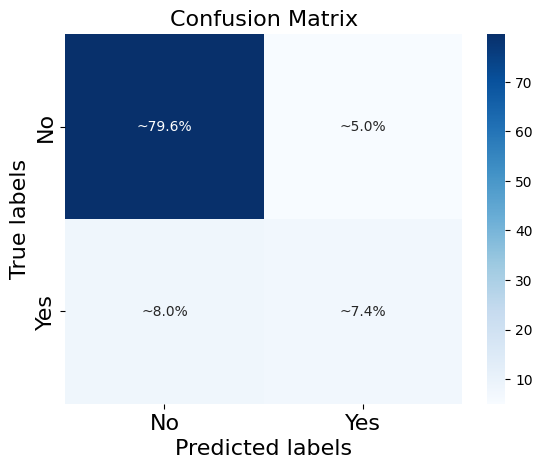

In [ ]:
# Computamos el total de número de muestras en el test set
total_samples = np.sum(cm_xgb)

# Computamos la confusion matrix en porcentaje
cm_percent_xgb = cm_xgb / total_samples * 100

# Creamos un heatmap para mostrar la confusion matrix
ax = sns.heatmap(cm_percent_xgb, annot=True, fmt='.1f', cmap='Blues')

# Añadimos etiquetas y título plot
plt.xlabel('Predicted labels', fontsize=16)
ax.set_xticklabels(['No','Yes'], fontsize=16)
plt.ylabel('True labels', fontsize=16)
ax.set_yticklabels(['No','Yes'], fontsize=16)
plt.title('Confusion Matrix', fontsize=16)

# Agregar %
texts = ax.texts
for text in texts:
    text.set_text('~' + text.get_text() + '%')


plt.show()

El modelo clasificó correctamente el 79% de las muestras negativas (True negatives).

El modelo clasificó incorrectamente el 8% de las muestras negativas como positivas (False negatives).

El 5% de las muestras fueron clasificadas incorrectamente como positivas (False positives).

Finalmente, el modelo clasificó correctamente el 7% de las muestras positivas (True positives).

En general, este modelo parece tener un buen rendimiento en la clasificación de muestras negativas (79% de True negatives), pero un rendimiento mediocre en la clasificación de muestras positivas (7% de True positives). Además, el modelo tiene una tasa de error de clasificación de muestras negativas (8% de False negatives) y una tasa de falsos positivos relativamente baja (5% de False positives). Por lo tanto, se podría considerar que el modelo necesita mejorar en la detección de muestras positivas para mejorar su precisión en general.

### Definimos y graficamos shap values para XGBoost

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


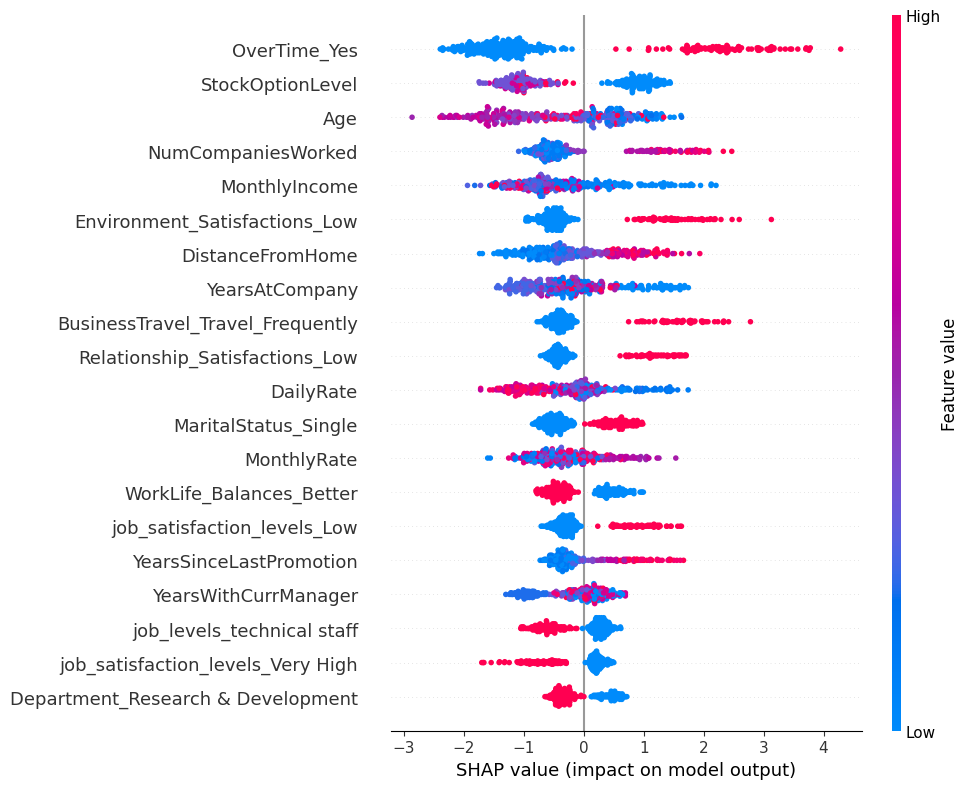

In [ ]:
# calcular SHAP values
explainer = shap.Explainer(clf)
shap_values = explainer(X_test)

# Resumir los efectos en las variables
shap.summary_plot(shap_values, X_test, plot_size=(10, 8)) # Por defecto, muestra 20 features, no consideré necesario ampliarlas


Shap values se ordenan por importancia, por lo que la variable más relevante para el modelo que en nuestro caso es OverTime y podemos ver que tiene un elevado impacto cuando es positivo y un menor impacto cuando OverTime es "No", ya que cuando hicimos el one hot encoding, pusimos como 0 el No y como 1 el Yes

### Analizamos si el XGBoost model tiene underfitting / overfitting

In [ ]:
y_train_pred_xgb = clf.predict(X_train) #Prediccion en Train

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
print('% de aciertos sobre el set de train:',train_accuracy)

% de aciertos sobre el set de train: 1.0


In [ ]:
y_test_pred = clf.predict(X_test) #Prediccion en Test

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_pred_xgb)

#print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8702064896755162


El modelo probablemente tiene overfitting (variance), al ser el accuracy del train set mayor al del test set

## Comparación entre ambos modelos

In [ ]:
# Create a DataFrame
df = pd.DataFrame({'Model': ['Logistic Regression', 'XGBoost'],
                   'Accuracy': [test_accuracy_logreg, test_accuracy_xgb],
                   'Precision': [test_precision_logreg, test_precision_xgb],
                   'Recall': [test_recall_logreg, test_recall_xgb],
                   'F1 Score': [test_f1_logreg, test_f1_xgb],
                   'AUC-ROC score':[test_auc_roc_logreg, test_roc_auc_xgb]})

# Establecemos la columna de modelo como index
df.set_index('Model', inplace=False)

# Creamos Styler object
styler = df.style

# Aplicamos formato
styler = styler.set_properties(**{'text-align': 'center', 'border': '1px solid black'})
styler = styler.applymap(lambda x: 'background-color: #C2DFFF' if x > 0.8 else '', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
styler = styler.set_table_styles([{'selector': 'th', 'props': [('background-color', '#7AB6FF'), ('color', 'white'), ('border', '1px solid black')]},
                                  {'selector': 'tr:nth-child(odd)', 'props': [('background-color', 'white')]},
                                  {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#F2F2F2')]},
                                  {'selector': 'tbody tr:last-child', 'props': [('border-bottom', '2px solid black')]}])



display(styler)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC score
0,Logistic Regression,0.805310,0.427083,0.788462,0.554054,0.868266
1,XGBoost,0.870206,0.595238,0.480769,0.531915,0.783704


Comparando los dos modelos, podemos ver que el modelo XGBoost tiene una precisión y un accuracy general más altos que el modelo de Regresión Logística. Sin embargo, la Regresión Logística tiene una mayor recall (sensibilidad) y un puntaje F1 ligeramente mejor que XGBoost.

El puntaje AUC-ROC es más alto en la Regresión Logística que en XGBoost, lo que indica que el modelo de Regresión Logística tiene una mejor capacidad para distinguir entre las clases positivas y negativas.

En general, la elección del modelo dependerá del contexto y del objetivo de la clasificación. Si el objetivo es maximizar la precisión y el accuracy general, entonces XGBoost parece ser la mejor opción. Si el objetivo es maximizar el recall (sensibilidad) y obtener un mejor equilibrio entre la precisión y el recall, entonces la Regresión Logística podría ser la mejor opción.

Debido a todos los resultados y conclusiones arrojadas, teniendo en cuenta que el modelo de regresión logística no tiene under/overfitting y que tiene mejor capacidad para distinguir entre clases positivas y negativas, el modelo de regresión logística es el elegido para el problema planteado.

## Probando mejorar el modelo

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
X.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,Job_Involvements_Low,Job_Involvements_Medium,Job_Involvements_Very High,Performance_Ratings_Outstanding,Relationship_Satisfactions_Low,Relationship_Satisfactions_Medium,Relationship_Satisfactions_Very High,WorkLife_Balances_Best,WorkLife_Balances_Better,WorkLife_Balances_Good
count,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,...,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03,1.356000e+03
mean,3.569744e-16,1.100398e-16,9.955982e-17,-2.986795e-16,1.054548e-16,-6.353489e-17,5.108991e-17,-1.991196e-16,3.143994e-17,2.423496e-17,...,-1.833997e-17,-7.859986e-18,6.287989e-17,7.859986e-17,1.047998e-17,-1.047998e-17,-6.811988e-17,-1.309998e-18,-3.929993e-18,9.169984e-18
std,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,...,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00,1.000369e+00
min,-2.048512e+00,-1.736012e+00,-1.027431e+00,-1.775481e+00,-1.354103e+00,-1.718383e+00,-1.059729e+00,-1.164464e+00,-9.254007e-01,-1.524894e+00,...,-2.453636e-01,-5.887053e-01,-3.338793e-01,-4.280725e-01,-4.858996e-01,-5.078238e-01,-6.376825e-01,-3.393104e-01,-1.244537e+00,-5.500851e-01
25%,-6.857406e-01,-8.341896e-01,-9.044004e-01,-8.868669e-01,-8.104294e-01,-8.827858e-01,-6.576603e-01,-8.901869e-01,-9.254007e-01,-6.132519e-01,...,-2.453636e-01,-5.887053e-01,-3.338793e-01,-4.280725e-01,-4.858996e-01,-5.078238e-01,-6.376825e-01,-3.393104e-01,-1.244537e+00,-5.500851e-01
50%,-1.179192e-01,4.411796e-03,-2.892485e-01,1.747521e-03,-2.590719e-01,-1.345344e-02,-6.576603e-01,-3.416327e-01,2.332728e-01,-1.574308e-01,...,-2.453636e-01,-5.887053e-01,-3.338793e-01,-4.280725e-01,-4.858996e-01,-5.078238e-01,-6.376825e-01,-3.393104e-01,8.035117e-01,-5.500851e-01
75%,5.634664e-01,8.795820e-01,5.719643e-01,8.533363e-01,3.942855e-01,8.685735e-01,5.485445e-01,7.554756e-01,2.332728e-01,4.503306e-01,...,-2.453636e-01,1.698643e+00,-3.338793e-01,-4.280725e-01,-4.858996e-01,-5.078238e-01,1.568178e+00,-3.393104e-01,8.035117e-01,-5.500851e-01
max,2.721188e+00,1.727481e+00,2.417420e+00,1.680241e+00,3.330364e+00,1.775078e+00,2.558886e+00,2.675415e+00,2.550620e+00,4.552720e+00,...,4.075585e+00,1.698643e+00,2.995094e+00,2.336053e+00,2.058038e+00,1.969187e+00,1.568178e+00,2.947154e+00,8.035117e-01,1.817900e+00


In [ ]:
X_res.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,Job_Involvements_Low,Job_Involvements_Medium,Job_Involvements_Very High,Performance_Ratings_Outstanding,Relationship_Satisfactions_Low,Relationship_Satisfactions_Medium,Relationship_Satisfactions_Very High,WorkLife_Balances_Best,WorkLife_Balances_Better,WorkLife_Balances_Good
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,...,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,-0.129316,-0.119936,0.054065,-0.020292,-0.135594,0.065465,0.019119,-0.046759,-0.125221,-0.149595,...,0.056069,0.051469,-0.069946,-0.025763,0.041303,-0.010130,-0.036123,-0.006413,-0.081961,0.010774
std,0.969728,0.940160,0.959640,0.937582,0.943515,0.945601,0.950016,0.946943,0.965059,0.954318,...,1.053756,0.969069,0.872918,0.942248,0.982767,0.940775,0.927467,0.957814,0.972680,0.960063
min,-2.048512,-1.736012,-1.027431,-1.775481,-1.354103,-1.718383,-1.059729,-1.164464,-0.925401,-1.524894,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,-0.637683,-0.339310,-1.244537,-0.550085
25%,-0.799305,-0.912868,-0.781370,-0.800745,-0.875871,-0.713618,-0.657660,-0.847925,-0.925401,-0.765192,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,-0.637683,-0.339310,-1.244537,-0.550085
50%,-0.300365,-0.197689,-0.166218,-0.046431,-0.420886,0.090180,-0.277266,-0.341633,-0.452392,-0.309371,...,-0.245364,-0.588705,-0.333879,-0.428073,-0.485900,-0.507824,-0.637683,-0.339310,0.803512,-0.550085
75%,0.449902,0.666838,0.694995,0.742260,0.300549,0.862123,0.548544,0.525529,0.233273,0.172854,...,-0.245364,1.063966,-0.333879,-0.428073,-0.332402,-0.507824,0.828543,-0.339310,0.803512,0.211880
max,2.721188,1.727481,2.417420,1.680241,3.330364,1.775078,2.558886,2.675415,2.550620,4.552720,...,4.075585,1.698643,2.995094,2.336053,2.058038,1.969187,1.568178,2.947154,0.803512,1.817900


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# ROSE
ros = RandomOverSampler(random_state=42)

X_rose, y_rose = ros.fit_resample(X, y)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Random Under Sampler
rus = RandomUnderSampler(random_state=42)

X_rus, y_rus = rus.fit_resample(X, y)


In [ ]:
# Entrenamos logreg en la data original
rfc1 = LogisticRegression(random_state=42)
rfc1.fit(X_train, y_train)

# Evaluamos el modelo en el test set
y_pred1 = rfc1.predict(X_test)
print("Model performance on original data:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1-score:", f1_score(y_test, y_pred1))

# Resample la data usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenamos logreg en la resampled data
rfc2 = LogisticRegression(random_state=42)
rfc2.fit(X_resampled, y_resampled)

# Evaluamos el modelo en el test set
y_pred2 = rfc2.predict(X_test)
print("Model performance on resampled data:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1-score:", f1_score(y_test, y_pred2))

Model performance on original data:
Accuracy: 0.8849557522123894
Precision: 0.6511627906976745
Recall: 0.5384615384615384
F1-score: 0.5894736842105263
Model performance on resampled data:
Accuracy: 0.8171091445427728
Precision: 0.44565217391304346
Recall: 0.7884615384615384
F1-score: 0.5694444444444444


In [ ]:
# Entrenamos xgb en la data original
rfc1 = XGBClassifier(random_state=42)
rfc1.fit(X_train, y_train)

# Evaluamos el modelo en el test set
y_pred1 = rfc1.predict(X_test)
print("Model performance on original data:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))
print("F1-score:", f1_score(y_test, y_pred1))

# Resample la data usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Entrenamos xgb en la resampled data
rfc2 = XGBClassifier(random_state=42)
rfc2.fit(X_resampled, y_resampled)

# Evaluamos el modelo en el test set
y_pred2 = rfc2.predict(X_test)
print("Model performance on resampled data:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))
print("F1-score:", f1_score(y_test, y_pred2))


Model performance on original data:
Accuracy: 0.8702064896755162
Precision: 0.6111111111111112
Recall: 0.4230769230769231
F1-score: 0.5
Model performance on resampled data:
Accuracy: 0.8908554572271387
Precision: 0.7142857142857143
Recall: 0.4807692307692308
F1-score: 0.5747126436781609


In [ ]:
from scipy.stats import ks_2samp, chi2_contingency

# Perform the Kolmogorov-Smirnov test to compare distributions
ks_statistic, p_value = ks_2samp(y, y_resampled)
print(f"Kolmogorov-Smirnov test: statistic={ks_statistic:.3f}, p-value={p_value:.3f}")

Kolmogorov-Smirnov test: statistic=0.329, p-value=0.000


En este caso, el estadístico de prueba es 0,329, lo que significa que la distancia máxima entre las funciones de distribución empírica de los datos originales y los datos remuestreados es 0,329. El valor p es 0,000, que es menor que el nivel de significación de 0,05, lo que indica una fuerte evidencia en contra de la hipótesis nula de similitud entre las distribuciones. Por lo tanto, podemos concluir que la distribución de los datos remuestreados es significativamente diferente de los datos originales. Creamos datos sinteticos que no asemejan la distribucion o caractericas de los datos originales

# **6. Next steps**

Es necesario mejorar los modelos para poder tener mejores métricas para poder llevarlo a producción y predecir cuántas personas abandonan su puesto de trabajo y poder tomar medidas sobre ello:



*   Realizar un **EDA** más exhaustivo, analizando si hay más outliers y elegir la forma de tratarlos
*   Ajuste de **hiperparámetros**: Ver si se pueden mejorar los hp
*   Selección de **variables**: Realizar un análisis más profundo de las variables seleccionadas. Aunque durante el proceso se fue probando si eliminando ciertas variables mejoraba el modelo (y no fue así) se puede mejorar la precisión y la eficiencia.
*   Generar nuevas **variables**: Puede mejorar el rendimiento del modelo al agregar información adicional al conjunto de datos
*   Utilizar **modelos más complejos**: Se puede probar con modelos más complejos como Redes Neuronales, SVM, Random Forest, etc.
